# Computational Finance Course Work        
                                                                                                      (w1911121)

In [12]:

import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib as mpl
import os
import matplotlib.pyplot as plt
import scipy.stats as si
from mpl_toolkits.mplot3d import Axes3D

## Download the Cosmos atom trading data from yahoo finance

In [13]:
Atom = yf.download("ATOM-USD", start = "2021-11-01", end="2022-11-01")

[*********************100%***********************]  1 of 1 completed


In [14]:
Atom.head() #Shows the first five rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-01,37.232906,38.160053,34.832924,37.357956,37.357956,641024625
2021-11-02,37.288105,38.299908,36.348965,37.066208,37.066208,589565702
2021-11-03,37.102943,38.631554,35.663345,38.418926,38.418926,779063904
2021-11-04,38.494930,39.223927,36.261200,37.516636,37.516636,673952982
2021-11-05,37.543777,38.967430,36.437016,36.902592,36.902592,520572680


In [15]:
Atom.tail()   #Shows the last five rows

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-10-27,12.284245,13.194210,12.281391,12.692690,12.692690,413565733
2022-10-28,12.687106,13.695119,12.661024,13.563468,13.563468,657830833
2022-10-29,13.560004,13.795448,13.366401,13.459847,13.459847,358054899
2022-10-30,13.460769,14.078148,13.319649,13.934368,13.934368,339221079
2022-10-31,13.932910,14.456722,13.827878,14.322818,14.322818,409224593


In [16]:
adj_close =  Atom['Adj Close'] #only Adj Close 
close = Atom['Close']

## Movement of Atom_usd price (Adj Close) for 1 year

array([<AxesSubplot:xlabel='Date'>], dtype=object)

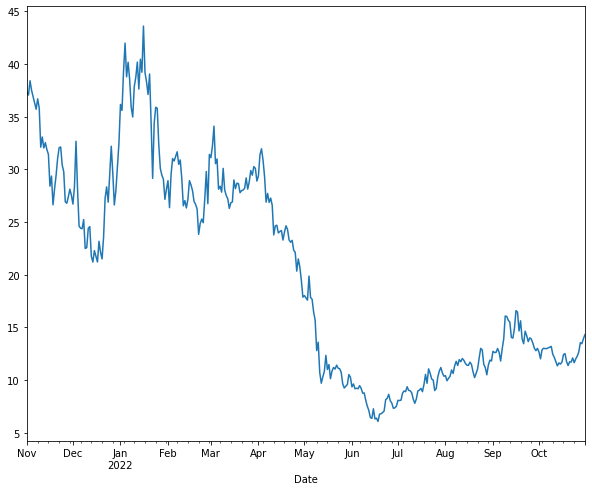

In [17]:

adj_close.plot(figsize=(10, 8), subplots=True)       #Plotting the Adj CLose Column of the data

In [18]:
atom_data = pd.DataFrame(adj_close.dropna()) 
atom_data.tail()

,Adj Close
Date,
2022-10-27,12.692690
2022-10-28,13.563468
2022-10-29,13.459847
2022-10-30,13.934368
2022-10-31,14.322818


In [19]:
atom_data.head()

,Adj Close
Date,
2021-11-01,37.357956
2021-11-02,37.066208
2021-11-03,38.418926
2021-11-04,37.516636
2021-11-05,36.902592


In [20]:
#Maximum Price in this 1 year time period

In [21]:
atom_data[atom_data['Adj Close'] == atom_data['Adj Close'].max()]

,Adj Close
Date,
2022-01-16,43.605412


In [22]:

atom_data.describe().round(2) # Descriptive Statistics for Adjacent close price 


,Adj Close
count,365.00
mean,20.22
std,9.87
min,6.08
25%,11.36
50%,17.88
75%,28.41
max,43.61


## Returns and volatility

In [25]:

atom_adj_close = pd.DataFrame(adj_close.dropna())

### Normal Daily Return

In [26]:
normal_return = atom_adj_close.pct_change()
normal_return.head()

,Adj Close
Date,
2021-11-01,NaN
2021-11-02,-0.007810
2021-11-03,0.036495
2021-11-04,-0.023486
2021-11-05,-0.016367


### Annualized normal return and annualized volatility

In [27]:

dfnr = pd.DataFrame(normal_return, columns = ['Adj Close']) 
nr = dfnr.mean() * 365
nv = dfnr.std() * (365 ** 0.5)
print('The annualized normal return is %.8f and its annualized volatility is %.8f' % (nr,nv))

The annualized normal return is -0.28073704 and its annualized volatility is 1.16532054


### Daily Log Return

In [28]:

log_rets = np.log(atom_adj_close / atom_adj_close.shift(1))
log_rets.head().round(4)

,Adj Close
Date,
2021-11-01,NaN
2021-11-02,-0.0078
2021-11-03,0.0358
2021-11-04,-0.0238
2021-11-05,-0.0165


### Annualized Log return and annualized Volatility

In [29]:

dflr = pd.DataFrame(log_rets, columns = ['Adj Close']) 
lr = dflr.mean() * len(dflr)
lv = dflr.std() * (len(dflr) ** 0.5)
print('The annualized log return is %.8f and its annualized volatility is %.8f ' % (lr,lv))

The annualized log return is -0.96132575 and its annualized volatility is 1.16994580 


## Movement of closed price and log volatility

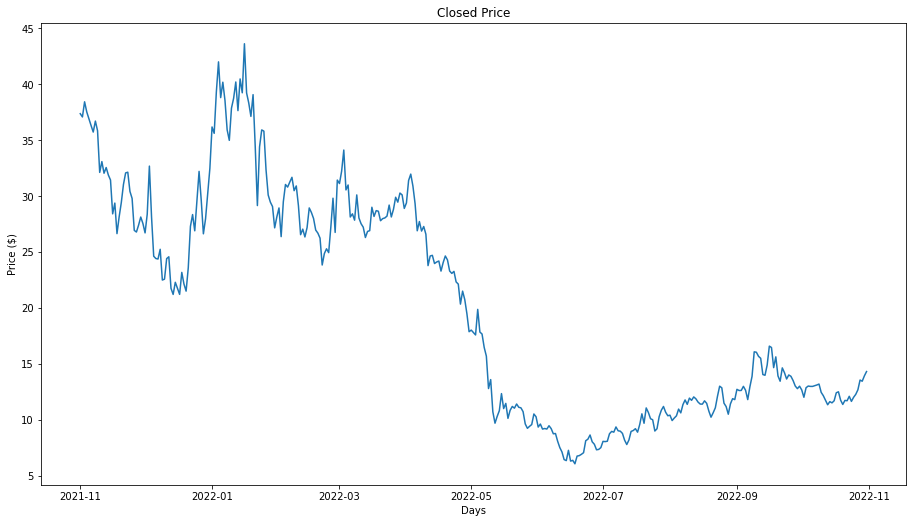

In [30]:
fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(Atom['Close'])
plt.xlabel('Days')
plt.ylabel('Price ($)')
plt.title('Closed Price');


Text(0.5, 1.0, 'Log Return')

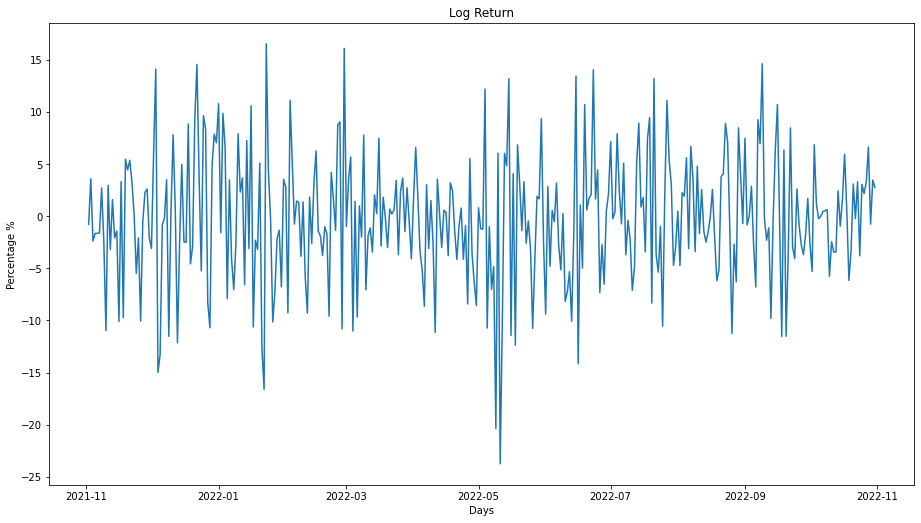

In [31]:

fig = plt.figure()
fig.set_size_inches(15.5, 8.5, forward=True)
plt.plot(dflr * 100)
plt.xlabel('Days')
plt.ylabel('Percentage %')
plt.title('Log Return')


Text(0.5, 1.0, 'ATOM-USD Average annualized volatility:Adj Close    116.99\ndtype: float64%')

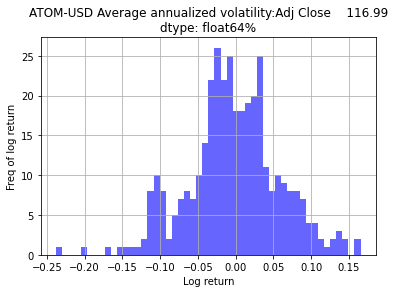

In [32]:
str_vol = str(round(lv, 4)*100)
fig, ax = plt.subplots()
dflr['Adj Close'].hist(ax=ax, bins=50, alpha=0.6, color='b')
ax.set_xlabel('Log return')
ax.set_ylabel('Freq of log return')
ax.set_title('ATOM-USD Average annualized volatility:'+ str_vol + '%')

## Methodology

### Binomial Tree (CRR Tree)

Binomial Tree pricing method is discrete model. Valuation is performed iteratively, starting at each of the final nodes, and then working backwards through the tree towards the first node (valuation date). The value computed at each stage is the value of the option at that point in time.

In [33]:
S0 = 14            # spot stock price (Adj close price of SOL-USD on 23rd Mar'22)  
K = 11.0              # As it's put option, I'm choosing strike price ( $11.0) below the current spot price
T = 1/52              # Time to maturity  is set as 1 week
r = 0.0475              # Risk free rate 1 year bond as dated on 26,Mar'22    
sig =1.16         # annualized log volatility (last one year)
N = 6                 # Number of time steps  
payoff = "put"        # the option type 


## Step 1: Create the binomial price tree.

In [34]:
dT = float(T) / N                             # Delta t
u = np.exp(sig * np.sqrt(dT))                 # up factor
d = 1.0 / u                                   # down factor 
print ('Crypto Price movement UP factor %s and DOWN factor %s ' %(u,d))

Crypto Price movement UP factor 1.0678764688531852 and DOWN factor 0.9364379019175513 


In [35]:

S = np.zeros((N + 1, N + 1))
S[0, 0] = S0
z = 1
for t in range(1, N + 1):
    for i in range(z):
        S[i, t] = S[i, t-1] * u
        S[i+1, t] = S[i, t-1] * d
    z += 1

In [36]:

S

array([[14.        , 14.95027056, 15.96504214, 17.04869282, 18.20589789,
        19.44164995, 20.7612805 ],
       [ 0.        , 13.11013063, 14.        , 14.95027056, 15.96504214,
        17.04869282, 18.20589789],
       [ 0.        ,  0.        , 12.27682322, 13.11013063, 14.        ,
        14.95027056, 15.96504214],
       [ 0.        ,  0.        ,  0.        , 11.49648258, 12.27682322,
        13.11013063, 14.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        , 10.76574202,
        11.49648258, 12.27682322],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        10.08144887, 10.76574202],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  9.44065083]])

In [58]:

a = np.exp(r * dT)    # risk free compound return
p = (a - d)/ (u - d)  # risk neutral up probability
q = 1.0 - p           # risk neutral down probability

In [57]:
print('Probalilty for moving  up : ', p)
print('Probalilty for moving  down : ', q)

Probalilty for moving  up :  0.484746256348314
Probalilty for moving  down :  0.515253743651686


### Step 2: Find option value at each final node.

In [39]:
S_T = S[:,-1]
V = np.zeros((N + 1, N + 1))
if payoff =="call":
    V[:,-1] = np.maximum(S_T-K, 0.0)
elif payoff =="put":
    V[:,-1] = np.maximum(K-S_T, 0.0)


In [40]:
V

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.23425798],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.55934917]])

## Step 3: Find option value at earlier nodes.

## European Option

In [41]:
# for European Option
for j in range(N-1, -1, -1):
    for i in range(j+1):
        V[i,j] = np.exp(-r*dT) * (p * V[i,j + 1] + q * V[i + 1,j + 1])
V


array([[0.05387353, 0.00850099, 0.        , 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.09657554, 0.01650116, 0.        , 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.17193736, 0.03203019, 0.        ,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.30361162, 0.06217338,
        0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.53084434,
        0.12068392, 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.91687658, 0.23425798],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 1.55934917]])

In [42]:
print('European ' + payoff, str( V[0,0]))

European put 0.053873530343810934


## Monte Carlo Simulation

In [43]:
def mcs_simulation_np(p,s):
    M = p  # M is number of time steps
    I = s  # I is number of simulation
    dt = T / M 
    S = np.zeros((M + 1, I))
    S[0] = S0 
    rn = np.random.standard_normal(S.shape) 
    for t in range(1, M + 1): 
        S[t] = S[t-1] * np.exp((r - sigma ** 2 / 2) * dt + sigma * np.sqrt(dt) * rn[t]) 
    return S

In [44]:

T = 1/52
r = 0.0475
sigma = 1.16
S0 = 14
K = 11


Underlying asset price is calculated using 100 time steps and 10,000 simulations

In [45]:
S = mcs_simulation_np(100,10000)

In [46]:
S = np.transpose(S)
S

array([[14.        , 13.96786188, 13.99251419, ..., 13.72785253,
        13.29783447, 13.29117188],
       [14.        , 13.95396318, 14.09893714, ..., 12.06359701,
        12.13340903, 12.49218511],
       [14.        , 13.9102972 , 13.92094779, ..., 13.17217093,
        13.14272192, 13.35139017],
       ...,
       [14.        , 13.80843757, 13.91094761, ..., 13.58791892,
        13.43666258, 13.37396722],
       [14.        , 13.87076536, 13.91925734, ..., 15.63995988,
        15.39120601, 15.24202997],
       [14.        , 13.94019397, 14.32489019, ..., 16.18261686,
        16.16509416, 15.84636165]])

Text(0, 0.5, 'Frequency')

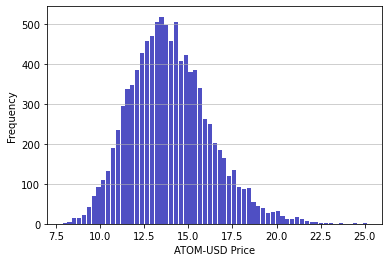

In [47]:

import matplotlib.pyplot as plt
n, bins, patches = plt.hist(x=S[:,-1], bins='auto', color='#0504aa',alpha=0.7, rwidth=0.85)
#n, bins, patches = plt.hist(x=S[:,1], bins=[30,40,50,60,70,80,90,100,110,120],range =(S.min(),S.max()), color='#0504aa',alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('ATOM-USD Price')
plt.ylabel('Frequency')


In [48]:

p = np.mean(np.maximum(K - S[:,-1],0))
print('European put from Monte Carlo Simulation', str(p))

European put from Monte Carlo Simulation 0.06153634378861033


## Black Scholes Model

In [49]:
def euro_option_bs(S, K, T, r, vol, payoff):
    
    #S: spot price
    #K: strike price
    #T: time to maturity
    #r: risk free rate
    #vol: volatility of underlying asset
    #payoff: call or put
    
    d1 = (np.log(S / K) + (r + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        option_value = S * si.norm.cdf(d1, 0.0, 1.0) - K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        option_value = - S * si.norm.cdf(-d1, 0.0, 1.0) + K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return option_value

In [50]:
bsp = euro_option_bs(14,11,1/52,0.0475,1.16, "put")
print('European put option price using BSM is $', bsp)

European put option price using BSM is $ 0.057697866223459626


In [51]:
S = np.linspace(2,40,14)
cp = np.zeros((len(S),1))
for i in range(len(S)):
    cp[i] = euro_option_bs(S[i],11,1/52,0.0475,1.16, "put")

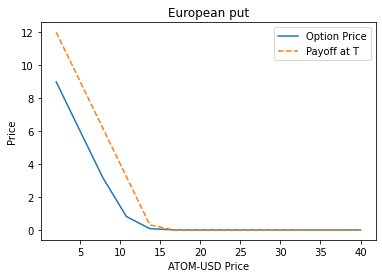

In [52]:
fig = plt.figure()
plt.plot(S, cp, '-')
plt.plot(S, np.maximum(14- S,0), '--')
plt.xlabel('ATOM-USD Price')
plt.ylabel('Price')
plt.title('European put')
plt.legend(['Option Price','Payoff at T'])


## The average European put price (Atom-USD)

In [176]:

print(' Binomial price tree method - Eurpoean put price for ATOM-USD wiht 1 week expiry  ' , str( V[0,0].round(4)))
print(' Monte Carlo Simulation method -Eurpoean put price for ATOM-USD with 1 week expiry  ', str(p.round(4)))
print(' BSM method - Eurpoean put price for ATOM-USD with 1 week expiry  ', bsp.round(4))



 Binomial price tree method - Eurpoean put price for ATOM-USD wiht 1 week expiry   0.0539
 Monte Carlo Simulation method -Eurpoean put price for ATOM-USD with 1 week expiry   0.0581
 BSM method - Eurpoean put price for ATOM-USD with 1 week expiry   0.0577


In [177]:
Put_prices=( float( V[0,0].round(4)),(p.round(4)),bsp)
Put_price1 = pd.DataFrame (Put_prices)

In [178]:

Put_price1['Method'] = ('Binomial price tree ', 'Monte Carlo Simulation method', 'Black Scholes Model')
Put_price1.columns = ['Price','Method' ]
Put_price1

,Price,Method
0,0.053900,Binomial price tree
1,0.058100,Monte Carlo Simulation method
2,0.057698,Black Scholes Model


In [179]:

Price_mean= Put_price1['Price'].mean()
print ('The combine Vanilla put price for ATOM-USD is $', Price_mean)

The combine Vanilla put price for ATOM-USD is $ 0.05656595540781987


## Greeks for risk assessment


### Delta

In [180]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as si

In [181]:

def delta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        delta = np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0)
    elif payoff == "put":
        delta =  - np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0)
    
    return delta

In [182]:
d = delta(14,11,1/52,0,0.0475,1.16, "put")
print('The value of Delta is', d.round(4),'.','If the stock price decrease (or increase) $1, then the value of the option will increase(or decrease) by $', abs(d).round(4))


     

The value of Delta is -0.0577 . If the stock price decrease (or increase) $1, then the value of the option will increase(or decrease) by $ 0.0577


In [193]:
S = np.linspace(5,25,3)
Delta_Call = np.zeros((len(S),1))
Delta_Put = np.zeros((len(S),1))
for i in range(len(S)):
    Delta_Put [i] = delta(S[i],11,1/52,0,0.0475,1.16,"put")


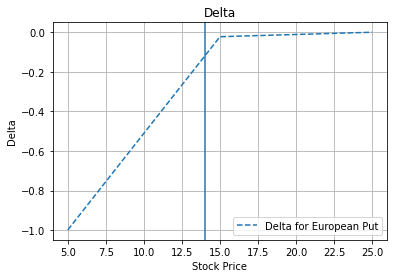

In [194]:
fig = plt.figure()
plt.plot(S, Delta_Put, '--')
plt.grid()
plt.axvline(14)
plt.xlabel('Stock Price')
plt.ylabel('Delta')
plt.title('Delta')
plt.legend(['Delta for European Put'])


In [251]:
S = np.linspace(1,25,30)
T = np.linspace(0.001, 0.03, 15)
Delta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Delta[i,j] = delta(S[j], 11,T[i], 0.0475, 0, 1.16, "put")

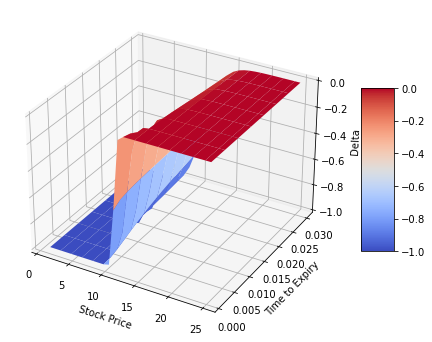

In [252]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S, T = np.meshgrid(S, T)
surf = ax.plot_surface(S, T, Delta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Delta')
fig.colorbar(surf, shrink=0.5, aspect=5);



### Gamma

In [253]:

def gamma(S, K, T, r, q, vol):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    gamma = np.exp(- q * T) * si.norm.pdf(d1, 0.0, 1.0) / (vol * S * np.sqrt(T))
    
    return gamma


In [256]:
g = gamma(14,11,1/52,0.0475,0,1.16)
print('The value of Gamma is', g.round(4),'.','If the stock price increase (or decrease) $1, then the value of the delta will increase (or decrease) by', abs(g).round(4))



The value of Gamma is 0.0504 . If the stock price increase (or decrease) $1, then the value of the delta will increase (or decrease) by 0.0504


In [267]:

S = np.linspace(1,30,9)
Gamma = np.zeros((len(S),1))
for i in range(len(S)):
    Gamma [i] = gamma(S[i],11,1/52,0.0475,0,1.16)

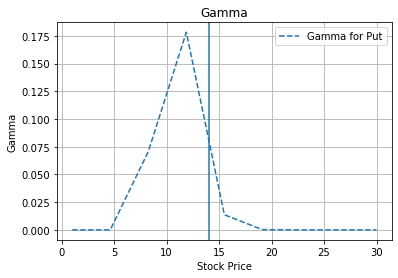

In [268]:
fig = plt.figure()
plt.plot(S, Gamma, '--')
plt.grid()
plt.axvline(14)
plt.xlabel('Stock Price')
plt.ylabel('Gamma')
plt.title('Gamma')
plt.legend(['Gamma for Put'])




In [272]:
S = np.linspace(9, 13, 30)
T = np.linspace(0.001, 0.005, 10)
Gamma = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Gamma[i,j] = gamma(S[j], 11,T[i], 0.0475,0, 1.16)

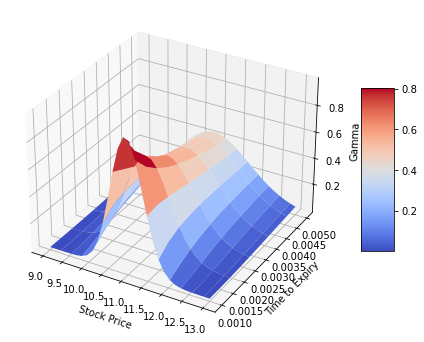

In [273]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Gamma, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Gamma')
fig.colorbar(surf, shrink=0.5, aspect=5);


### Speed



In [274]:

def speed(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    speed = - np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / ((vol **2) * (S**2) * np.sqrt(T)) * (d1 + vol * np.sqrt(T))
    
    return speed


In [275]:

s = speed(14,11,1/52, 0.0475,0, 1.16, "put")

print('The value of Speed is', s.round(4),'.','If the stock price decrease (or increase) $1, then the value of the gamma will increase (or decrease) by', abs(s).round(4))



The value of Speed is -0.0054 . If the stock price decrease (or increase) $1, then the value of the gamma will increase (or decrease) by 0.0054


In [279]:
S = np.linspace(1,30,9)
Speed = np.zeros((len(S),1))
for i in range(len(S)):
    Speed [i] = speed(S[i],11,1/52,0.0475,0, 1.16, "put")

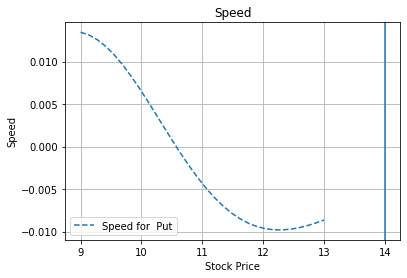

In [280]:
fig = plt.figure()
plt.plot(S, Speed, '--')
plt.grid()
plt.axvline(14)
plt.xlabel('Stock Price')
plt.ylabel('Speed')
plt.title('Speed')
plt.legend(['Speed for  Put'])

In [281]:

S = np.linspace(9, 13, 30)
T = np.linspace(0.001, 0.005, 60)
Speed = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Speed[i,j] = speed(S[j],11,T[i],0.0475,0, 1.16, "put")

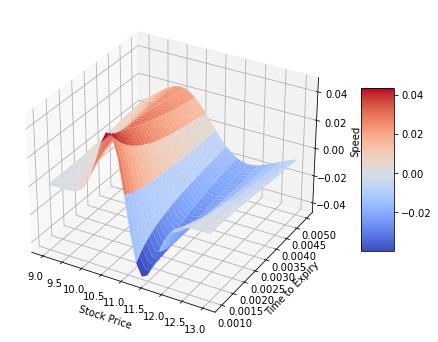

In [282]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Speed, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Speed')
fig.colorbar(surf, shrink=0.5, aspect=5);


### Theta


In [283]:

def theta(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        theta = vol * S * np.exp(-q * T) * si.norm.pdf(-d1, 0.0, 1.0) / (2 * np.sqrt(T)) - q * S * np.exp(-q * T) * si.norm.cdf(-d1, 0.0, 1.0) + r * K * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return theta


In [284]:
t = theta(14,11,1/52, 0.0475,0, 1.16, 'put')
t_1 = t/365
print('Annualized Theta value is ', t.round(4), 'and Theta value for 1 day before maturity is ', t_1.round(4))


Annualized Theta value is  6.6892 and Theta value for 1 day before maturity is  0.0183


In [285]:

print('At time 1 day  before maturity, option value decrease by ', t_1.round(4))



At time 1 day  before maturity, option value decrease by  0.0183


In [286]:

T = np.linspace(0.001,0.04,12)
Theta_Put = np.zeros((len(T),1))
for i in range(len(T)):
    Theta_Put [i] = theta(14,11, T[i], 0.0475, 0,1.16, 'put')


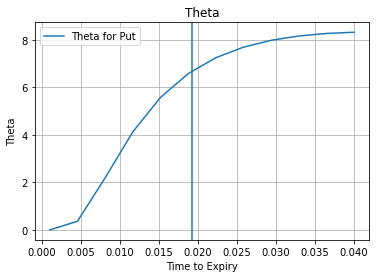

In [287]:

fig = plt.figure()
plt.plot(T, Theta_Put, '-')
plt.grid()
plt.axvline(1/52)
plt.xlabel('Time to Expiry')
plt.ylabel('Theta')
plt.title('Theta')
plt.legend([ 'Theta for Put'])


In [289]:

S = np.linspace(9, 13, 30)
T = np.linspace(0.01, 0.04, 20)
Theta = np.zeros((len(T),len(S)))
for j in range(len(S)):
    for i in range(len(T)):
        Theta[i,j] = theta(S[j],11, T[i],0.0475, 0,1.16, 'put')

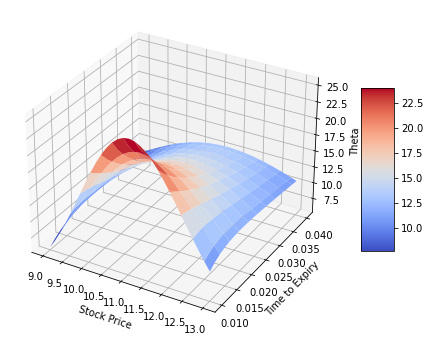

In [290]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,T  = np.meshgrid(S,T)
surf = ax.plot_surface(S,T, Theta, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Time to Expiry')
ax.set_zlabel('Theta')
fig.colorbar(surf, shrink=0.5, aspect=5);

### Rho


In [291]:

def rho(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    d2 = (np.log(S / K) + (r - q - 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    if payoff == "call":
        rho =  K * T * np.exp(-r * T) * si.norm.cdf(d2, 0.0, 1.0)
    elif payoff == "put":
        rho = - K * T * np.exp(-r * T) * si.norm.cdf(-d2, 0.0, 1.0)
    
    return rho



In [292]:

r = rho(14,11,1/52, 0.0475, 0,1.16, 'put')
print('The value of Rho is', r.round(4),'.','If the interest rate decrease by 1%, then the value of the put option will increase by $', abs(r).round(4))


     

The value of Rho is -0.0163 . If the interest rate decrease by 1%, then the value of the put option will increase by $ 0.0163


In [294]:

r = np.linspace(0,0.07,11)
Rho_Put = np.zeros((len(r),1))
for i in range(len(r)):
    Rho_Put [i] = rho(14,11,1/52, r[i],0,1.16, 'put')


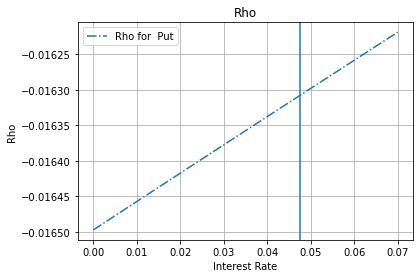

In [296]:

fig = plt.figure()
plt.plot(r, Rho_Put, '-.')
plt.xlabel('Interest Rate')
plt.ylabel('Rho')
plt.grid()
plt.axvline(0.0475)
plt.title('Rho')
plt.legend(['Rho for  Put'])



In [299]:

S = np.linspace(9, 13, 30)
R = np.linspace(0,0.07,30)
Rho = np.zeros((len(R),len(S)))
for j in range(len(S)):
    for i in range(len(R)):
        Rho[i,j] = rho(S[j],11,1/52, R[i],0,1.16, 'put')


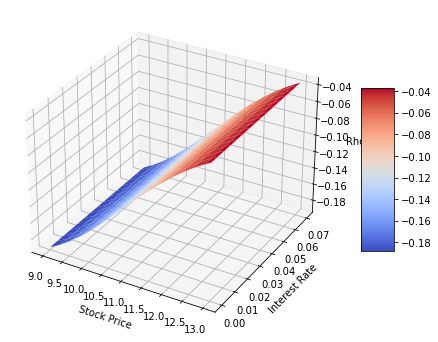

In [300]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
S,R = np.meshgrid(S,R)
surf = ax.plot_surface(S,R, Rho, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_xlabel('Stock Price')
ax.set_ylabel('Interest Rate')
ax.set_zlabel('Rho')
fig.colorbar(surf, shrink=0.5, aspect=5);



### Vega



In [301]:

def vega(S, K, T, r, q, vol, payoff):
    
    d1 = (np.log(S / K) + (r - q + 0.5 * vol ** 2) * T) / (vol * np.sqrt(T))
    vega = S * np.sqrt(T) * np.exp(-q * T) * si.norm.pdf(d1, 0.0, 1.0)
    
    return vega



In [302]:

v = vega(14,11,1/52, 0.0475,0, 1.16, 'put')
print('The value of Vega is', v.round(4),'.','If the volatility increases 1%, then the value of the option will increase $', v.round(4)*0.01)



The value of Vega is 0.2205 . If the volatility increases 1%, then the value of the option will increase $ 0.002205


In [303]:

vol = np.linspace(0.1,10,13)
Vega = np.zeros((len(vol),1))
for i in range(len(vol)):
    Vega [i] = vega(14,11,1/52, 0.0475,0, vol[i], 'put')


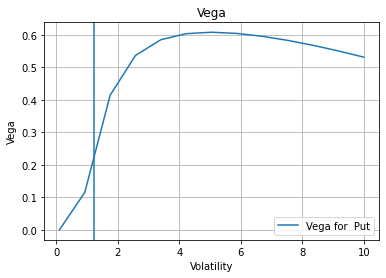

In [304]:

fig = plt.figure()
plt.plot(vol, Vega, '-')
plt.grid()
plt.axvline(1.2172)
plt.xlabel('Volatility')
plt.ylabel('Vega')
plt.title('Vega')
plt.legend(['Vega for  Put'])



In [307]:

S = np.linspace(9, 13, 30)
V =  np.linspace(0.1,10,30)
Vega = np.zeros((len(V),len(S)))
for j in range(len(S)):
    for i in range(len(V)):
        Vega[j,i] = vega(S[j] ,11,1/52, 0.0475,0, V[i], 'put')


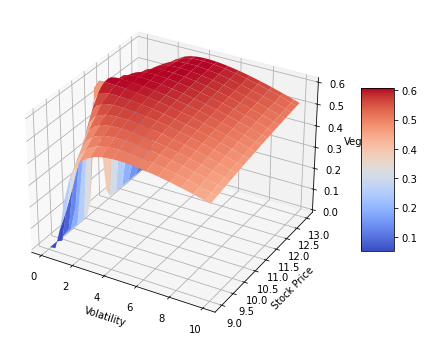

In [308]:

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(projection='3d')
V, S = np.meshgrid(V, S)
surf = ax.plot_surface(V, S, Vega, rstride=2, cstride=2, cmap=plt.cm.coolwarm, linewidth=0.5, antialiased=True)
ax.set_ylabel('Stock Price')
ax.set_xlabel('Volatility')
ax.set_zlabel('Vega')
fig.colorbar(surf, shrink=0.5, aspect=5);


### end